In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from IPython.display import clear_output

import main

In [11]:
result = main.run(total_periods = 1000000, learning_rate = 0.125, gamma = 0.95, beta =0.0002, alpha=2)

 84%|████████▎ | 835962/1000000 [05:25<01:03, 2569.21it/s]


In [15]:
result.last_bid

array([0.95, 0.95])

In [13]:
result.print_results()

alpha =  2  (1 is FPA, 2 is SPA) 
Name         Last_bid    Average Bid (last 2500 bids)    Average Payoff
---------  ----------  ------------------------------  ----------------
QLearning        0.95                            0.95           0.02528
QLearning        0.95                            0.95           0.02472
Name       Description
---------  -----------------------------------------------------------------------------------------
QLearning  :  learning_rate=0.125, gamma=0.95, policy = (Boltzmann: temp_max = 3, temp_min = 0.0001)
QLearning  :  learning_rate=0.125, gamma=0.95, policy = (Boltzmann: temp_max = 3, temp_min = 0.0001)




In [4]:
result.env.action_space

array([0.05, 0.11, 0.17, 0.23, 0.29, 0.35, 0.41, 0.47, 0.53, 0.59, 0.65,
       0.71, 0.77, 0.83, 0.89, 0.95])

In [21]:
result.env.agents

[QLearning(Q={(0.05, 0.05): {0.05: 39.24146803959108, 0.10999999999999999: 39.05351647513507, 0.16999999999999998: 39.149364377284385, 0.22999999999999998: 39.11614316700133, 0.29: 39.080239038059055, 0.3499999999999999: 39.24966951745226, 0.4099999999999999: 39.04905730280007, 0.4699999999999999: 39.139269920404466, 0.5299999999999999: 39.14365782848454, 0.59: 39.1527262467046, 0.6499999999999999: 39.24564631974552, 0.71: 39.156657512882234, 0.7699999999999999: 39.18609777687937, 0.83: 39.235579210751645, 0.8899999999999999: 39.15442933617745, 0.95: 39.215092778744506}, (0.05, 0.10999999999999999): {0.05: 37.50834572123905, 0.10999999999999999: 37.090730446833845, 0.16999999999999998: 37.13584357809583, 0.22999999999999998: 37.74092162182039, 0.29: 36.74679821253055, 0.3499999999999999: 37.17127161755341, 0.4099999999999999: 37.797612210536336, 0.4699999999999999: 37.18766312872306, 0.5299999999999999: 37.835178720063325, 0.59: 36.392821542124764, 0.6499999999999999: 36.51012063203143

# Bid Price History

[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95]


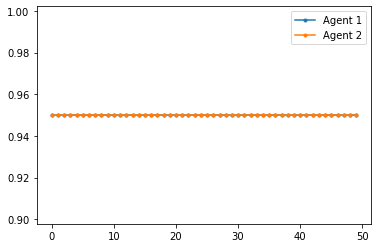

In [6]:
agent_1 = np.array(result.bid_history)[-50:,0]
agent_2 = np.array(result.bid_history)[-50:,1]
print(agent_1)
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df,marker=".")
plt.legend(['Agent 1', "Agent 2"])
plt.show()

# Payoff History

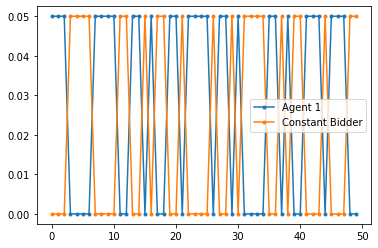

In [7]:
agent_1 = np.array(result.payoff_history)[-50:,0]
agent_2 = np.array(result.payoff_history)[-50:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df,marker=".")
plt.legend(['Agent 1', "Constant Bidder"])
plt.show()

# keys with highest Qvalue average sorted

In [9]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

#for agent 1
for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        new_dict1[a] += action_space[a]

        
for key,value in new_dict1.items():
    new_dict1[key] = new_dict1[key]/(len(actions)**2) 
    #divide by len(actions)^2 because there are 2 agents so the number of state space is squared

#for agent 2
for state,action_space in result.env.agents[1].Q.items():
    for a in actions:
        new_dict2[a] += action_space[a]
        
for key,value in new_dict2.items():
    new_dict2[key] = new_dict2[key]/(len(actions)**2)

print(sorted(new_dict1, key=lambda k: new_dict1[k],reverse=True))
print(sorted(new_dict2, key=lambda k: new_dict2[k],reverse=True))

[0.95, 0.83, 0.8899999999999999, 0.29, 0.22999999999999998, 0.4699999999999999, 0.05, 0.6499999999999999, 0.71, 0.59, 0.4099999999999999, 0.10999999999999999, 0.3499999999999999, 0.7699999999999999, 0.5299999999999999, 0.16999999999999998]
[0.8899999999999999, 0.7699999999999999, 0.4699999999999999, 0.5299999999999999, 0.6499999999999999, 0.29, 0.83, 0.4099999999999999, 0.95, 0.3499999999999999, 0.71, 0.22999999999999998, 0.16999999999999998, 0.59, 0.10999999999999999, 0.05]


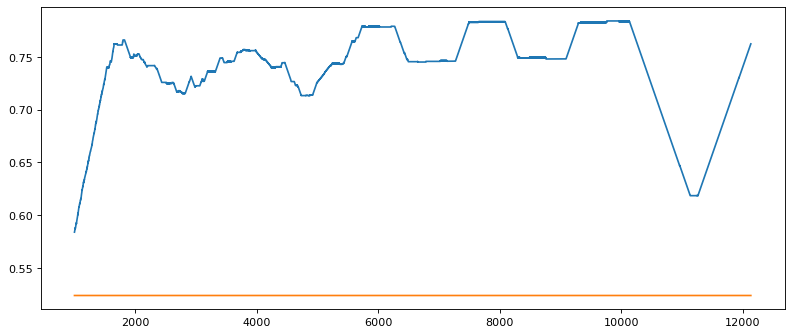

In [7]:

x =np.linspace(0,len(np.array(result.bid_history)),num=len(np.array(result.bid_history)))
agent_1 = np.array(result.bid_history)[:,0]
agent_2 = np.array(result.bid_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

In [5]:

x =np.linspace(0,len(np.array(result.reward_history)),num=len(np.array(result.reward_history)))
agent_1 = np.array(result.reward_history)[:,0]
agent_2 = np.array(result.reward_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

AttributeError: 'Results' object has no attribute 'reward_history'

In [16]:
#doing Qlearning agents with memory now
two_firm = []
three_firm = []
four_firm = []

for i in range(20):
    print("iteration" ,i, "num agents: 2" )
    two_firm.append(main.run(num_agents=2,total_periods = 1000000, learning_rate = 0.125, gamma = 0.95, beta =0.0002, alpha=2).last_bid)
    clear_output()
for i in range(20):
    print("iteration" ,i,"num agents: 3" )
    three_firm.append(main.run(num_agents=3,total_periods = 1000000, learning_rate = 0.125, gamma = 0.95, beta =0.0002, alpha=2).last_bid)
    clear_output()

for i in range(20):
    print("iteration" ,i,"num agents: 4" )
    four_firm.append(main.run(num_agents=4,total_periods = 1000000, learning_rate = 0.125, gamma = 0.95, beta =0.0002, alpha=2).last_bid)
    clear_output()

In [19]:
three_firm

[array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.89, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.59, 0.89]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95]),
 array([0.95, 0.95])]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

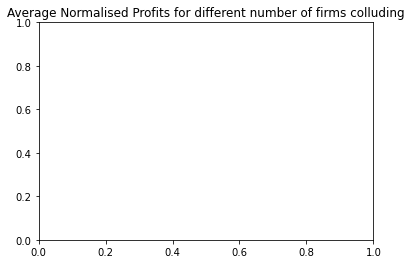

In [18]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.show()

# Heat map of prices for FPA


In [8]:
freq_values = np.zeros((len(result.env.action_space),len(result.env.action_space)))

for i in range(1000):
    print("iteration: ",i+1)
    result = main.run(alpha=1)
    agent1_last_price = result.bid_history[-1:][0][0]
    agent2_last_price = result.bid_history[-1:][0][1]
    index_of_agent1_price = np.where(result.env.action_space == agent1_last_price)[0][0]
    index_of_agent2_price = np.where(result.env.action_space == agent2_last_price)[0][0]
    freq_values[index_of_agent1_price][index_of_agent2_price] += 1
    clear_output()



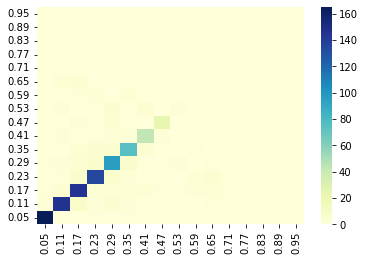

In [9]:
ax = sns.heatmap(freq_values,yticklabels=np.round(result.env.action_space,2), xticklabels=np.round(result.env.action_space,2),cmap="YlGnBu")
ax.invert_yaxis()

# Heat map of prices for SPA

In [ ]:
freq_values2 = np.zeros((len(result.env.action_space),len(result.env.action_space)))

for i in range(1000):
    print("iteration: ",i+1)
    result = main.run(alpha=2)
    agent1_last_price = result.bid_history[-1:][0][0]
    agent2_last_price = result.bid_history[-1:][0][1]
    index_of_agent1_price = np.where(result.env.action_space == agent1_last_price)[0][0]
    index_of_agent2_price = np.where(result.env.action_space == agent2_last_price)[0][0]
    freq_values2[index_of_agent1_price][index_of_agent2_price] += 1
    clear_output()


iteration:  1


 16%|█▌        | 161284/1000000 [00:48<04:49, 2893.77it/s]

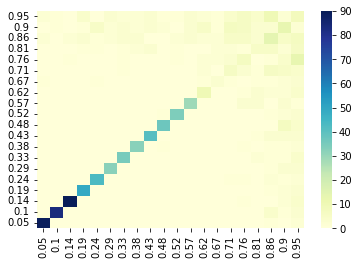

In [11]:
ax = sns.heatmap(freq_values2,yticklabels=np.round(result.env.action_space,2), xticklabels=np.round(result.env.action_space,2),cmap="YlGnBu")
ax.invert_yaxis()

In [21]:
freq_values2 = np.zeros((len(result.env.action_space),len(result.env.action_space)))

for i in range(10):
    print("iteration: ",i+1)
    result = main.run(alpha=2)
    agent1_last_price = result.bid_history[-1:][0][0]
    agent2_last_price = result.bid_history[-1:][0][1]
    index_of_agent1_price = np.where(result.env.action_space == agent1_last_price)[0][0]
    index_of_agent2_price = np.where(result.env.action_space == agent2_last_price)[0][0]
    freq_values2[index_of_agent1_price][index_of_agent2_price] += 1
    clear_output()


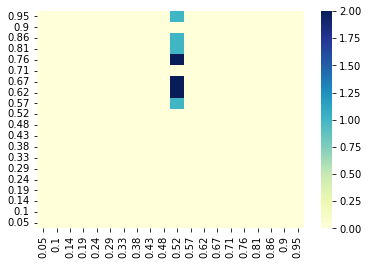

In [22]:
ax = sns.heatmap(freq_values2,yticklabels=np.round(result.env.action_space,2), xticklabels=np.round(result.env.action_space,2),cmap="YlGnBu")
ax.invert_yaxis()